# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Check how many records do we have


In [5]:
data=pd.read_excel('GermanCredit.xlsx')
data.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [6]:
data.shape

(1000, 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Creditability             1000 non-null   int64
 1   CreditAmount              1000 non-null   int64
 2   DurationOfCreditInMonths  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


# 3. Plot Histogram for column 'CreditAmount'

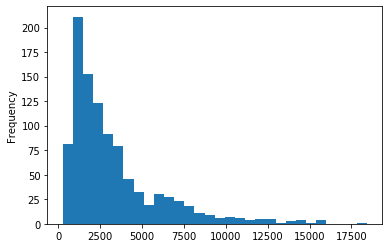

In [12]:
data['CreditAmount'].plot(kind='hist',bins=30)
plt.show()

# 3b. Create creditability dataframe

In [13]:
data['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [34]:
data.isna().sum()

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

In [48]:
data['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

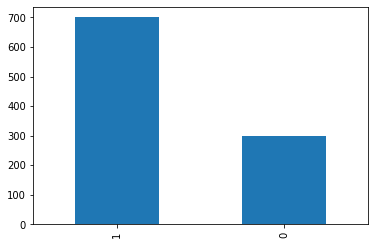

In [50]:
data['Creditability'].value_counts().plot(kind='bar')
plt.show()

# 6. Prepare input data for the model

In [14]:
inp=data.drop('Creditability',axis=1)
out=data['Creditability']

# 7. Fit logistic regression model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=1)

In [19]:
logReg=LogisticRegression()
logReg=logReg.fit(xtrain,ytrain)
logReg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 8. Test accuracy calculation

In [20]:
ypred=logReg.predict(xtest)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(ytest,ypred)

0.6933333333333334

# 9. Build a confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm=confusion_matrix(ytest,ypred)
cm

array([[ 10,  81],
       [ 11, 198]], dtype=int64)

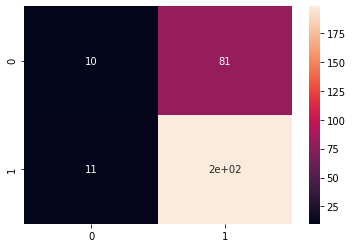

In [25]:
sns.heatmap(cm,annot=True)

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [35]:
yprob1=logReg.predict_proba(xtest)
yprob1

array([[0.33224476, 0.66775524],
       [0.19861238, 0.80138762],
       [0.23216301, 0.76783699],
       [0.24275314, 0.75724686],
       [0.26397677, 0.73602323],
       [0.5817892 , 0.4182108 ],
       [0.21054248, 0.78945752],
       [0.58810827, 0.41189173],
       [0.24258872, 0.75741128],
       [0.30753922, 0.69246078],
       [0.18562343, 0.81437657],
       [0.32418036, 0.67581964],
       [0.48991616, 0.51008384],
       [0.21279563, 0.78720437],
       [0.3638877 , 0.6361123 ],
       [0.26351216, 0.73648784],
       [0.30962114, 0.69037886],
       [0.20586571, 0.79413429],
       [0.44177798, 0.55822202],
       [0.19009263, 0.80990737],
       [0.29280932, 0.70719068],
       [0.43757492, 0.56242508],
       [0.36116552, 0.63883448],
       [0.18845483, 0.81154517],
       [0.26526832, 0.73473168],
       [0.31503254, 0.68496746],
       [0.30820867, 0.69179133],
       [0.54504631, 0.45495369],
       [0.22919283, 0.77080717],
       [0.2857509 , 0.7142491 ],
       [0.

In [40]:
non_default=logReg.predict_proba(xtest)[:,0]


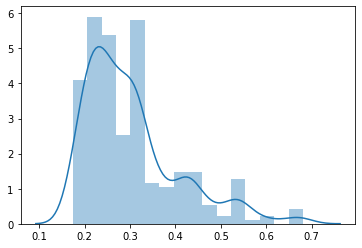

In [41]:
sns.distplot(non_default)
plt.show()

In [45]:
default=logReg.predict_proba(xtest)[:,1]


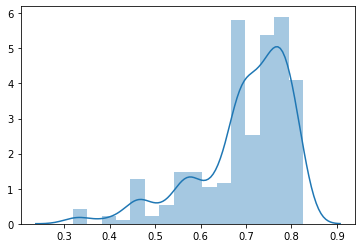

In [46]:
sns.distplot(default)
plt.show()